# 차원(dimention)

지금까지 **데이터가 가지는 속성을 특성**이라고 불렀다.(과일 사진의 경우 10000개의 픽셀이 있기 때문에 10000개의 특성을 가지고 있는 셈.)

머신러닝에서 **이런 특성을 차원(dimention)**이라고 부른다.

이 **차원을 줄일 수 있다면 저장 공간을 크게 절약할 수 있는 것**이다.

# 차원 축소(dimentionality reduction)

중요한 방향으로 밀어넣어 준다.(특성을 지우는 것이 아님.) - **압축**한다고 생각하면 편함.

**데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법.**

또한, **줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수도 있다.**

또한, 차원 축소된 데이터를 **지도 학습 알고리즘이나 다른 비지도 학습 알고리즘에 재사용**하여 **성능을 높이거나 훈련 속도를 빠르게 만들 수 있다**.

# 주성분 분석(principal component analysis) = PCA

**분산을 나타낸 직선의 중심이 원점을 지나면 이것을 주성분이라고 부른다.**


데이터에 있는 **분산이 큰 방향을 찾는 것**으로 이해할 수 있다.(**분산은 데이터가 널리 퍼져있는 정도**를 말한다.) 분산이 큰 방향이란 데이터를 잘 표현하는 어떤 벡터라고 생각할 수 있다.

이러한 **벡터를 주성분(principal component)**라고 부른다.

주성분 벡터는 원본 데이터에 있는 **어떤 방향**이다.

따라서 주성분 벡터의 **원소 개수는 원본 데이터셋에 있는 특성 개수**와 같다.

하지만, **원본 데이터는 주성분을 사용해 차원을 줄일 수 있다**.

* **주성부은 원본 차원가 같고 주성분으로 바꾼 데이터는 차원이 줄어든다.**
- **주성분이 가장 분산이 큰 방향**이기 때문에 주성분에 **투영**하여 바꾼 데이터는 **원본이 가지고 있는 특성을 가장 잘 나타내고 있는 것**이다.

- 첫 번째 주성분을 찾은 다음 이 **벡터에 수직이고 분산이 가장 큰 다음 방향을 찾는다**. -> **두 번째 주성분**
- 일반적으로 **주성분은 원본 특성의 개수만큼 찾을 수 있다**. 


**메인 데이터에 투영한다.**

`% 실제 사이킷런의 PCA 모델을 훈련하면 자동으로 특성마다 평균값을 빼서 원점에 맞춰 준다. 따라서 우리가 수동으로 데이터를 원점에 맞출 필요가 없다.`

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-04-05 13:04:59--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-04-05 13:04:59--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-04-05 13:05:00--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

In [2]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

## PCA 클래스

PCA 클래스 객체를 만들 때, **n_components 매개변수에 주성분의 개수를 지정**해야한다.

- **n_components** : **차원 축소를 진행할 때, 축소한 차원의 개수.**

**PCA는** k-평균과 마찬가지로 **비지도 학습**이기 때문에 **fit() 메서드에 타깃값을 제공하지 않음.**

**PCA 클래스가 찾은 주성분은 components_ 속성에 저장.**

**transform() 메소드를 사용해 원본 데이터의 차원을 줄인다.**

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)

pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
print(pca.components_.shape)

(50, 10000)


In [5]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):                                                     # ratio : 비율, 여기서는 캠퍼스 사이즈를 키우는 방식
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

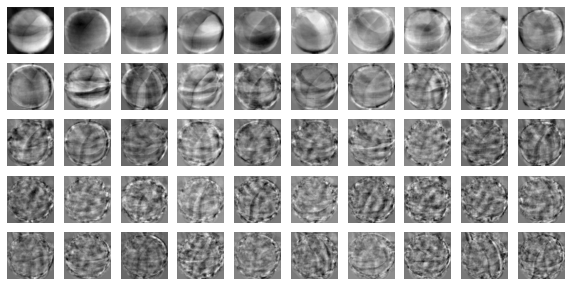

In [6]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

이 주성분은 **원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것**.(위에서 첫 번째 사진이 가장 원본 데이터를 잘 표현할 수 있는 사진이고 다음으로 넘어갈수록 흐릿해지는 것이다.)

In [7]:
print(fruits_2d.shape)

(300, 10000)


### transform() 메소드로 차원 축소

(300, 10000) 크기의 배열을 PCA 모델을 사용해 (300, 50) 크기의 배열로 변환. -> **50개의 특성을 가진 데이터로 변환됨**.

In [8]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)                                                            # 가장 중요한 것을 기준으로 10000개의 데이터를 50개로 압축.

(300, 50)


## 원본 데이터 재구성

10000개의 특성을 50개로 줄이면 **어느 정도 손실이 발생할 수밖에 없다**.

하지만, **최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성할 수 있다**.

원본 데이터를 재구성하기 위한 메서드는 **PCA 클래스의 inverse_transform()**이다.

In [9]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)                                                        # 원본 데이터 재구성(압축 풀기)

(300, 10000)


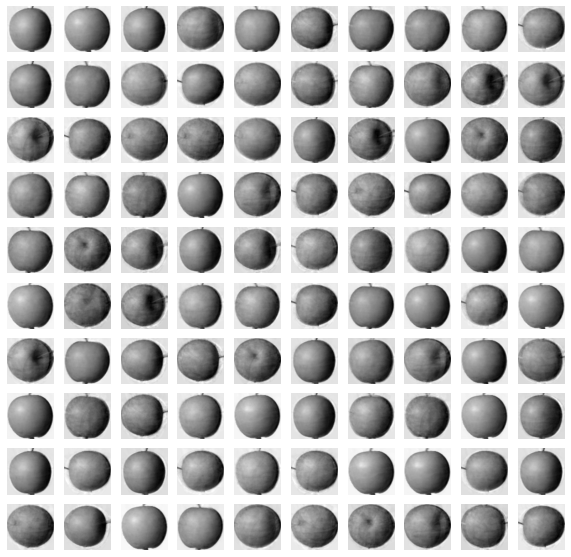

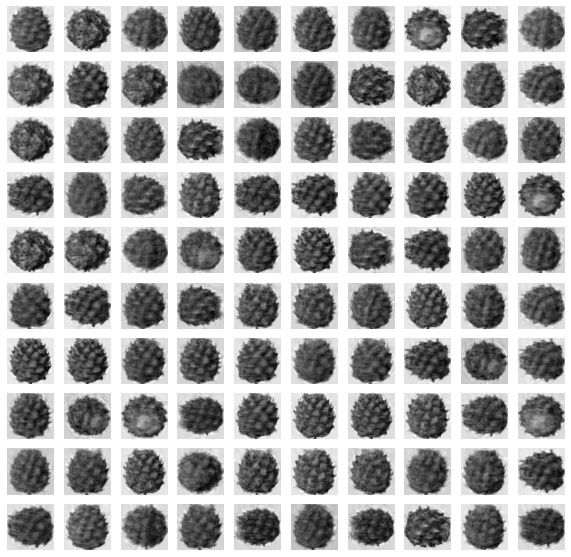

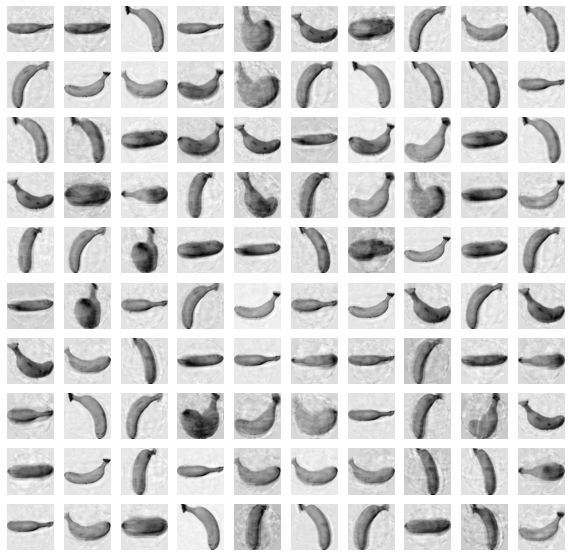

In [10]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n')

# 설명된 분산(explained variance)

**주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값.**

PCA 클래스의 **explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록**.(당연히 첫 번째 주성분의 설명된 분산이 제일 큼)

In [11]:
print(np.sum(pca.explained_variance_ratio_))                                       # 제일 중요한 데이터부터 50개까지의 데이터로 전체의 92%의 자료를 표현할 수 있다.
                                                                                   # 나머지 8%의 데이터는 원본 데이터와는 다르다고 판단할 수 있다.

0.9215036118434634


In [12]:
print(pca.explained_variance_ratio_)

[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645189 0.00578895 0.00511202
 0.00486382 0.00480347 0.00447834 0.00437314 0.00408036 0.00389455
 0.00372438 0.00359261 0.00331469 0.00317844 0.00304323 0.00303738
 0.00288882 0.00275852 0.00264839 0.00255798 0.00252105 0.0024739
 0.00239481 0.00231036 0.00222167 0.0021548  0.00214122 0.00194194
 0.00192649 0.00190218 0.00184264 0.00181737 0.00172393 0.0016987
 0.0016274  0.00157408]


In [13]:
import matplotlib.pyplot as plt

In [14]:
from matplotlib import font_manager, rc
font_path = "/content/drive/MyDrive/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
print(font_name)
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

Malgun Gothic


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backen

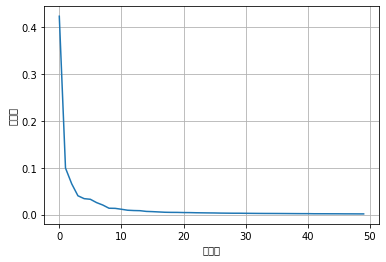

In [15]:
plt.plot(pca.explained_variance_ratio_)
plt.grid()
plt.xlabel('주성분')
plt.ylabel('중요도')
plt.show()

# 다른 알고리즘과 함께 사용하기

PCA로 축소한 데이터를 지도 학습에 적용해 보고 원본 데이터와 어떤 차이가 있는지 알아보기.

## 로지스틱 회귀 모델(LogisticRegression) 활용

차원 축소된 데이터를 분류하여 훈련을 하고 그에 대한 차이점을 알아본다.

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [17]:
target = np.array([0]*100 + [1]*100 + [2]*100)                                     # 0벡터 100개 그 뒤에 1벡터 100개 그 뒤에 2벡터 100개를 붙여 타깃으로 만듦(로지스틱 회귀 분석은 지도 학습.)
                                                                                   # 0은 파인애플, 1은 바나나, 2는 사과

In [18]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)                                     # 교차 검증(cross_validate) : 훈련, 테스트, 검증 모델로 나누기.
                                                                                     # 여기서 fruits_2d가 원본 데이터
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))                                                 # 학습한 시간. cross_validate()가 반환하는 딕셔너리에 fit_time이라는 학습 시간을 알려주는 장소가 있다.

0.9966666666666667
1.7916618824005126


In [19]:
scores = cross_validate(lr, fruits_pca, target)

print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))                                                 # 주성분으로 차원을 축소한 fruits_pca(50개의 특성)를 사용하였을 때는 학습 시간이 많이 줄어들었음을 알 수 있다.

1.0
0.034559774398803714


In [20]:
pca = PCA(n_components=0.5)                                                        # 전체에 50%개의 특성으로 주성분을 정하는 것이 아닌, 50%의 특성을 설명할 수 있는 주성분의 개수를 지정.
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [21]:
print(pca.n_components_)                                                           # 전체의 50%의 특성을 설명할 수 있는 주성분의 개수는 2개이다.

2


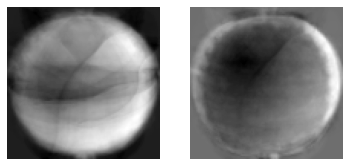

In [22]:
draw_fruits(pca.components_.reshape(-1, 100, 100), ratio=3)                        # 전체의 50%의 특성을 설명할 수 있는 주성분을 이미지로 나타내면 이렇다.
                                                                                   # 여기서 pca.n_components_는 (-1, 100*100)의 형태로 되어있으므로 이미지로 표현할 수 있도록 reshape을 사용해 (100, 100)으로 만들어준다.

In [23]:
pca90 = PCA(n_components=0.9)                                                      # 반면 n_components를 90%로 지정해보면 총 39개의 특성으로 압축이 가능하다.
pca90.fit(fruits_2d)

print(pca90.n_components_)

39


In [24]:
fruits_pca = pca.transform(fruits_2d)                                              # transform() 함수를 사용해 원본 데이터를 변환시킨다.
print(fruits_pca.shape)                                                            # transform 앞에는 적용시킬 클래스명, () 안에는 변환시킬 데이터를 넣는다.

(300, 2)


In [25]:
scores = cross_validate(lr, fruits_pca, target)                                    # 2개의 특성만을 가지고 훈련하는 것은 로지스틱 회귀 모델이 완전히 수렴하지 못했으니 반복 횟수를 증가하라는
print(np.mean(scores['test_score']))                                               # convergence 에러가 뜬다.
print(np.mean(scores['fit_time']))

0.9933333333333334
0.0508575439453125


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


## k-평균 알고리즘

차원 축소된 데이터로 k-평균 알고리즘을 이용하여 클러스터를 찾아본다.

In [26]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))                                   # unique를 사용하여 array 형태로 출력해 내용을 확인한다.

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


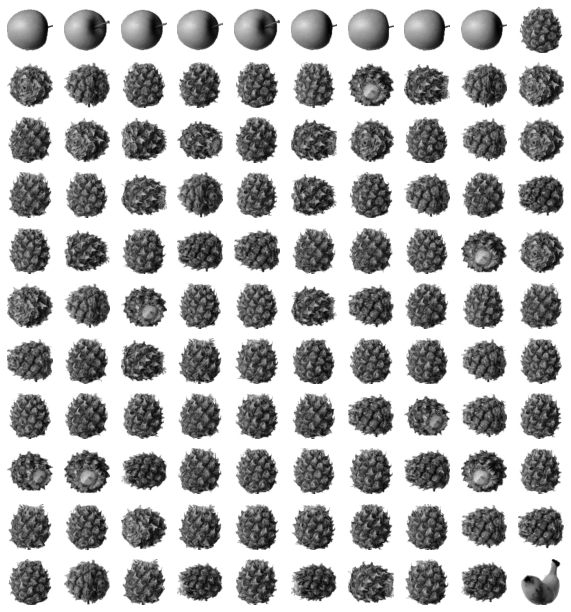

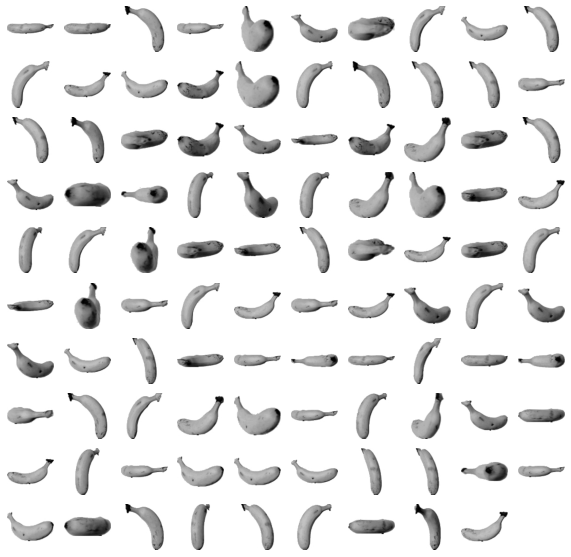

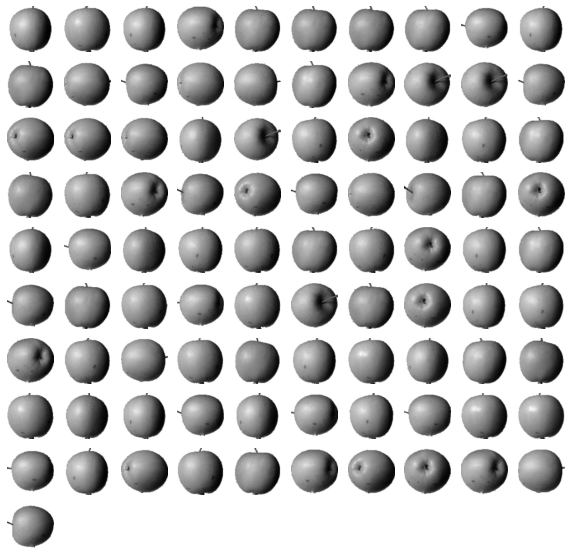

In [27]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])                                       # 이미지를 출력하기 위해 위에서 정의한 draw_fruits 함수를 활용한다.
    print('\n')

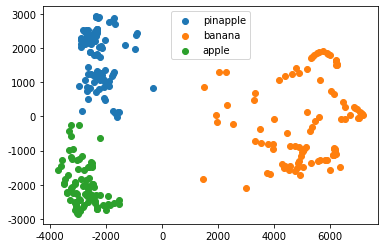

In [28]:
for label in range(0, 3):                                                              # 위처럼 이미지로 뽑아낼 수 있는 데이터를 산점도를 이용해서 한 눈에 볼 수 있게 만들수도 있다.
    data = fruits_pca[km.labels_ == label]                                         # fruits_pca가 (100, 100)의 행렬로 되어있으므로
    plt.scatter(data[:,0], data[:,1])                                              # 산점도의 x축에 fruits_pca의 행을 y축에는 fruits_pca의 열을 넣는다.
plt.legend(['pinapple', 'banana', 'apple'])
plt.show()

# 정리

- **차원 축소** : 원본 데이터의 특성을 **적은 수의 새로운 특성으로 변환**하는 **비지도 학습**의 한 종류. **저장 공간을 줄이고 시각화**하기 쉽다. 또한, 다른 알고리즘의 성능을 높일 수 있다.(**재사용**했을 경우.)

- **주성분 분석** : 데이터에서 가장 **분산이 큰 방향**을 찾는 방법.(이런 방향을 **주성분**이라고 부름.) 원본 데이터를 주성분에 **투영**하여 **새로운 특성을 만들 수 있다**. 일반적으로 주성분은 원본 데이터에 있는 **특성의 개수와 같다.**

- **설명된 분산** : 주성분이 얼마나 원본 데이터의 **분산을 잘 나타내는지** 기록한 것.

- **PCA** : 주성분 분석을 수행하는 클래스.
    - **n_components** : **주성분의 개수를 지정**(확률로 정의할 수도 있다.). 기본값은 None으로 샘플 개수와 특성 개수 중 작은 것의 값을 사용.

    - **components_** : **훈련 세트에서 찾은 주성분이 저장.**

    - **explained_variance_** : **설명된 분산이 저장**. 

    - **explained_variance_ratio_** : **설명된 분산의 비율이 저장**.

    - random_state : numpy의 난수 시드값을 지정할 수 있음.

    - **transform()** : **훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환**. **OO.transform(XX)**의 형태로 **OO은 적용(변환)시킬 클래스명**, **XX는 적용(변환)을 받아들일 원본(혹은 변환된) 데이터**.

    - **inverse_transform()** : trnasform()로 **차원을 축소시킨 데이터를 다시 원본 차원으로 복원**.
